In [14]:
import pandas as pd

train_df = pd.read_csv("/content/train.csv")
test_df = pd.read_csv("/content/test.csv")

print("Train Data:")
print(train_df.head())

print("\nTest Data:")
print(test_df.head())


Train Data:
                                              tweets       class
0  Be aware  dirty step to get money  #staylight ...  figurative
1  #sarcasm for #people who don't understand #diy...  figurative
2  @IminworkJeremy @medsingle #DailyMail readers ...  figurative
3  @wilw Why do I get the feeling you like games?...  figurative
4  -@TeacherArthurG @rweingarten You probably jus...  figurative

Test Data:
                                              tweets       class
0  no one ever predicted this was going to happen...  figurative
1  @Stooshie its as closely related as Andrews or...  figurative
2  I find it ironic when Vegans say they love foo...  figurative
3  Quick rt that throwing money vine I've not see...  figurative
4  yep, keep adding me to your #devops lists.... ...  figurative


In [15]:
print(train_df.info())
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81408 entries, 0 to 81407
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweets  81408 non-null  object
 1   class   81408 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81408 entries, 0 to 81407
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweets  81408 non-null  object
 1   class   81408 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB
None


In [16]:
print(train_df["class"].value_counts())


class
figurative    21238
irony         20894
sarcasm       20681
regular       18595
Name: count, dtype: int64


In [17]:
print("Train class labels:", train_df["class"].unique())
print("Test class labels:", test_df["class"].unique())


Train class labels: ['figurative' 'irony' 'regular' 'sarcasm']
Test class labels: ['figurative' nan 'irony' 'regular' 'sarcasm']


In [18]:
train_df = train_df.dropna()
train_df = train_df.drop_duplicates()
test_df = test_df.dropna()
test_df = test_df.drop_duplicates()

In [19]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

train_df["label"] = label_encoder.fit_transform(train_df["class"])
test_df["label"] = label_encoder.transform(test_df["class"])

label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)

print(train_df[["class", "label"]].head())


Label Mapping: {'figurative': 0, 'irony': 1, 'regular': 2, 'sarcasm': 3}
        class  label
0  figurative      0
1  figurative      0
2  figurative      0
3  figurative      0
4  figurative      0


In [20]:
import shutil

shutil.rmtree("/root/nltk_data", ignore_errors=True)
shutil.rmtree("/usr/nltk_data", ignore_errors=True)
shutil.rmtree("/usr/share/nltk_data", ignore_errors=True)
shutil.rmtree("/usr/lib/nltk_data", ignore_errors=True)
shutil.rmtree("/usr/local/nltk_data", ignore_errors=True)

print("Old nltk_data deleted. Ready to download again.")


Old nltk_data deleted. Ready to download again.


In [21]:
import nltk
import os

nltk.data.path.append("/usr/local/nltk_data/")

nltk.download("stopwords", download_dir="/usr/local/nltk_data/")
nltk.download("punkt", download_dir="/usr/local/nltk_data/")
nltk.download("wordnet", download_dir="/usr/local/nltk_data/")
nltk.download("omw-1.4", download_dir="/usr/local/nltk_data/")


[nltk_data] Downloading package stopwords to /usr/local/nltk_data/...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /usr/local/nltk_data/...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /usr/local/nltk_data/...
[nltk_data] Downloading package omw-1.4 to /usr/local/nltk_data/...


True

In [22]:
nltk.download("punkt_tab", download_dir="/usr/local/nltk_data/")


[nltk_data] Downloading package punkt_tab to /usr/local/nltk_data/...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [23]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Reinitialize NLTK resources
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@w+|\#','', text)  # Remove mentions (@) and hashtags (#)
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r"[^\w\s]", '', text)  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenization
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  # Lemmatization & Stopword removal
    return " ".join(tokens)

# Apply text cleaning
train_df["clean_text"] = train_df["tweets"].apply(clean_text)
test_df["clean_text"] = test_df["tweets"].apply(clean_text)

print(train_df[["tweets", "clean_text"]].head())


                                              tweets  \
0  Be aware  dirty step to get money  #staylight ...   
1  #sarcasm for #people who don't understand #diy...   
2  @IminworkJeremy @medsingle #DailyMail readers ...   
3  @wilw Why do I get the feeling you like games?...   
4  -@TeacherArthurG @rweingarten You probably jus...   

                                          clean_text  
0  aware dirty step get money staylight staywhite...  
1       sarcasm people dont understand diy artattack  
2  iminworkjeremy medsingle dailymail reader sens...  
3                  ilw get feeling like game sarcasm  
4  teacherarthurg rweingarten probably missed tex...  


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Use 1-gram and 2-gram for feature extraction
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train = vectorizer.fit_transform(train_df["clean_text"])
X_test = vectorizer.transform(test_df["clean_text"])
y_train = train_df["label"]
y_test = test_df["label"]

# Print the shape of training and testing data
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (81359, 5000)
Testing data shape: (8119, 5000)


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=label_mapping.keys()))


Logistic Regression Accuracy: 0.7236112821776081
              precision    recall  f1-score   support

  figurative       0.20      0.03      0.05      2044
       irony       0.66      0.95      0.78      2111
     regular       1.00      1.00      1.00      1859
     sarcasm       0.67      0.93      0.78      2105

    accuracy                           0.72      8119
   macro avg       0.63      0.73      0.65      8119
weighted avg       0.62      0.72      0.65      8119



In [26]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm, target_names=label_mapping.keys()))


SVM Accuracy: 0.7459046680625693
              precision    recall  f1-score   support

  figurative       0.28      0.01      0.01      2044
       irony       0.67      1.00      0.80      2111
     regular       1.00      1.00      1.00      1859
     sarcasm       0.68      0.99      0.80      2105

    accuracy                           0.75      8119
   macro avg       0.66      0.75      0.65      8119
weighted avg       0.65      0.75      0.65      8119



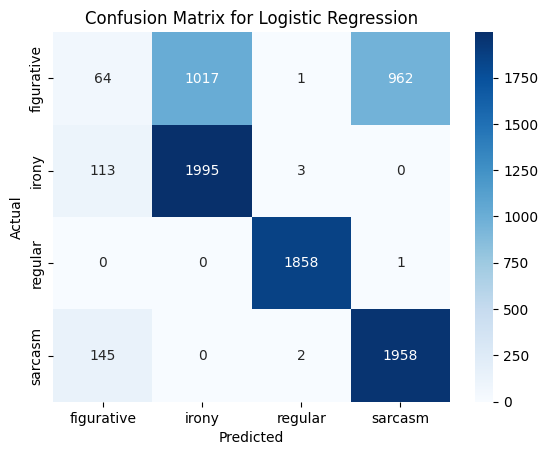

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


In [28]:
!pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.0/322.0 kB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 114.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 6.0 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
t

In [29]:
import joblib

# assume using Logistic Regression Model
joblib.dump(log_model, "sarcasm_model.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")


['vectorizer.pkl']

In [30]:
import gradio as gr
import joblib
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Load the trained model and vectorizer
model = joblib.load("sarcasm_model.pkl")
vectorizer = joblib.load("vectorizer.pkl")

# Text preprocessing function
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@w+|\#','', text)  # Remove mentions (@) and hashtags (#)
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r"[^\w\s]", '', text)  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenization
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  # Lemmatization & stopword removal
    return " ".join(tokens)

# Prediction function
def predict_sarcasm(text):
    cleaned_text = clean_text(text)
    text_vector = vectorizer.transform([cleaned_text])
    prediction = model.predict(text_vector)[0]
    return "Sarcasm Detected! 🤨" if prediction == 1 else "No Sarcasm 🙂"

# Create Gradio web interface
iface = gr.Interface(fn=predict_sarcasm, inputs="text", outputs="text",
                     title="Sarcasm Detector",
                     description="Enter a sentence and check if it's sarcastic!")

# Launch the web interface
iface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://9f32831852aec05f01.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
